# INFO 2950 Group Project: What Makes a Nobel Prize Laureate?

## Research Questions:
1. What region of the world produces the most Nobel Prize laureates?
2. At what age is your likelihood of winning the highest?
3. Are Nobel Prize laureates getting older?
4. Which universities dominate the Nobel Prize?
5. Does Nobel Prize favor one gender over another?
6. What proportion of laureates won the Nobel Prize more than once?
7. What proportion of laureates are family members?

## Data & Data Cleaning

**Step 1:** Imported libraries for our data analysis.

In [1]:
import pandas as pd 
import numpy as np
import seaborn 
from matplotlib import pyplot
from datetime import datetime, date

**Step 2:** Loaded the CSV file, laureate.csv, into a pandas data frame called nobel_data_raw and printed nobel_data_raw to check laureate.csv was loaded correctly into the data frame.

In [2]:
nobel_data_raw = pd.read_csv("laureate.csv")
print(nobel_data_raw)

      id       firstname    surname        born        died  \
0      1  Wilhelm Conrad    Röntgen  1845-03-27  1923-02-10   
1      2  Hendrik Antoon    Lorentz  1853-07-18  1928-02-04   
2      3          Pieter     Zeeman  1865-05-25  1943-10-09   
3      4   Antoine Henri  Becquerel  1852-12-15  1908-08-25   
4      5          Pierre      Curie  1859-05-15  1906-04-19   
..   ...             ...        ...         ...         ...   
970  933      Bernard L.    Feringa  1951-05-18  0000-00-00   
971  934     Juan Manuel     Santos  0000-00-00  0000-00-00   
972  935          Oliver       Hart  1948-10-09  0000-00-00   
973  936           Bengt  Holmström  1949-04-18  0000-00-00   
974  937             Bob      Dylan  1941-05-24  0000-00-00   

               bornCountry bornCountryCode                bornCity  \
0    Prussia (now Germany)              DE  Lennep (now Remscheid)   
1          the Netherlands              NL                  Arnhem   
2          the Netherlands       

**Step 3:** Printed out the number of rows and columns in nobel_data_raw to make sure that it matches the number of rows and columns of laureate.csv from the original source.

In [3]:
nobel_data_raw.shape

(975, 20)

**Step 4:** We dropped the columns with labels of "overallMotivation" and "motivation" because we decided that we will not use these columns for our data analysis.

In [4]:
nobel_data_raw.drop(['overallMotivation', 'motivation'], axis=1, inplace=True)

**Step 5:** Printed out the type of each column so that we know if we need to convert to another type in our upcoming data analysis.

In [5]:
nobel_data_raw.dtypes

id                   int64
firstname           object
surname             object
born                object
died                object
bornCountry         object
bornCountryCode     object
bornCity            object
diedCountry         object
diedCountryCode     object
diedCity            object
gender              object
year               float64
category            object
share              float64
name                object
city                object
country             object
dtype: object

**Step 6:** We converted values in 'born' and 'died' columns to datetime. If the values were not formatted to be able to convert to datetime, such as "0000-00-00," we renamed those values as "NaT". We also printed out the data frame to check if the columns were displaying values in datetime and in NaT properly.

In [6]:
nobel_data_raw['born'] = pd.to_datetime(nobel_data_raw['born'], format = '%Y-%m-%d', errors = 'coerce')
nobel_data_raw['died'] = pd.to_datetime(nobel_data_raw['died'], format = '%Y-%m-%d', errors = 'coerce')
print(nobel_data_raw)

      id       firstname    surname       born       died  \
0      1  Wilhelm Conrad    Röntgen 1845-03-27 1923-02-10   
1      2  Hendrik Antoon    Lorentz 1853-07-18 1928-02-04   
2      3          Pieter     Zeeman 1865-05-25 1943-10-09   
3      4   Antoine Henri  Becquerel 1852-12-15 1908-08-25   
4      5          Pierre      Curie 1859-05-15 1906-04-19   
..   ...             ...        ...        ...        ...   
970  933      Bernard L.    Feringa 1951-05-18        NaT   
971  934     Juan Manuel     Santos        NaT        NaT   
972  935          Oliver       Hart 1948-10-09        NaT   
973  936           Bengt  Holmström 1949-04-18        NaT   
974  937             Bob      Dylan 1941-05-24        NaT   

               bornCountry bornCountryCode                bornCity  \
0    Prussia (now Germany)              DE  Lennep (now Remscheid)   
1          the Netherlands              NL                  Arnhem   
2          the Netherlands              NL              Z

**Step 7:** We found the age in days of each laureate in the dataframe by using the "year" and year extracted from datetime values in the 'born' column. We made a new column called "age" because it will help us answer a few of our research questions. The values in the 'age' column were rounded down using np.floor to accurately represent each laureate's age at the time of their win. We also used .fillna() to fill missing "age" values with 0 to create models in the future without any errors involving NaN. Lastly, we used .head() to check if our data frame includes the new column.

In [7]:
nobel_data_raw['age_at_win'] = nobel_data_raw['year'] - nobel_data_raw['born'].dt.year
nobel_data_raw['age_at_win'] = nobel_data_raw['age_at_win'].apply(np.floor)
nobel_data_raw['age_at_win'] = nobel_data_raw['age_at_win'].fillna(0)
nobel_data_raw['age_at_win'] = nobel_data_raw['age_at_win'].astype(int)
nobel_data_raw.head()

,id,firstname,surname,born,died,bornCountry,bornCountryCode,bornCity,diedCountry,diedCountryCode,diedCity,gender,year,category,share,name,city,country,age_at_win
0,1,Wilhelm Conrad,Röntgen,1845-03-27,1923-02-10,Prussia (now Germany),DE,Lennep (now Remscheid),Germany,DE,Munich,male,1901.0,physics,1.0,Munich University,Munich,Germany,56
1,2,Hendrik Antoon,Lorentz,1853-07-18,1928-02-04,the Netherlands,NL,Arnhem,the Netherlands,NL,NaN,male,1902.0,physics,2.0,Leiden University,Leiden,the Netherlands,49
2,3,Pieter,Zeeman,1865-05-25,1943-10-09,the Netherlands,NL,Zonnemaire,the Netherlands,NL,Amsterdam,male,1902.0,physics,2.0,Amsterdam University,Amsterdam,the Netherlands,37
3,4,Antoine Henri,Becquerel,1852-12-15,1908-08-25,France,FR,Paris,France,FR,NaN,male,1903.0,physics,2.0,École Polytechnique,Paris,France,51
4,5,Pierre,Curie,1859-05-15,1906-04-19,France,FR,Paris,France,FR,Paris,male,1903.0,physics,4.0,École municipale de physique et de chimie indu...,Paris,France,44


**Step 8:** Created a new dataframe, nobel_data_valid, without any "age" values that are 0 so that we can create models using the "age" column without laureates who are missing their ages.

In [8]:
nobel_data_valid = nobel_data_raw.loc[nobel_data_raw['age_at_win']!=0]
nobel_data_valid.head()

,id,firstname,surname,born,died,bornCountry,bornCountryCode,bornCity,diedCountry,diedCountryCode,diedCity,gender,year,category,share,name,city,country,age_at_win
0,1,Wilhelm Conrad,Röntgen,1845-03-27,1923-02-10,Prussia (now Germany),DE,Lennep (now Remscheid),Germany,DE,Munich,male,1901.0,physics,1.0,Munich University,Munich,Germany,56
1,2,Hendrik Antoon,Lorentz,1853-07-18,1928-02-04,the Netherlands,NL,Arnhem,the Netherlands,NL,NaN,male,1902.0,physics,2.0,Leiden University,Leiden,the Netherlands,49
2,3,Pieter,Zeeman,1865-05-25,1943-10-09,the Netherlands,NL,Zonnemaire,the Netherlands,NL,Amsterdam,male,1902.0,physics,2.0,Amsterdam University,Amsterdam,the Netherlands,37
3,4,Antoine Henri,Becquerel,1852-12-15,1908-08-25,France,FR,Paris,France,FR,NaN,male,1903.0,physics,2.0,École Polytechnique,Paris,France,51
4,5,Pierre,Curie,1859-05-15,1906-04-19,France,FR,Paris,France,FR,Paris,male,1903.0,physics,4.0,École municipale de physique et de chimie indu...,Paris,France,44


**Step 9:** Printed out the type of each column again to check that changes made above are reflected in our data frame.

In [9]:
nobel_data_raw.dtypes

id                          int64
firstname                  object
surname                    object
born               datetime64[ns]
died               datetime64[ns]
bornCountry                object
bornCountryCode            object
bornCity                   object
diedCountry                object
diedCountryCode            object
diedCity                   object
gender                     object
year                      float64
category                   object
share                     float64
name                       object
city                       object
country                    object
age_at_win                  int64
dtype: object

**Step 10:** Found the rows that had 0 in the "age_at_win" column because we wanted to be aware the rows that may cause errors in our data analysis.

In [10]:
missing_ages = nobel_data_raw[nobel_data_raw['age_at_win'] == 0]
missing_ages

,id,firstname,surname,born,died,bornCountry,bornCountryCode,bornCity,diedCountry,diedCountryCode,diedCity,gender,year,category,share,name,city,country,age_at_win
489,467,Institut de droit international (Institute of ...,NaN,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,org,1904.0,peace,1.0,NaN,NaN,NaN,0
498,477,Bureau international permanent de la Paix (Per...,NaN,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,org,1910.0,peace,1.0,NaN,NaN,NaN,0
503,482,Comité international de la Croix Rouge (Intern...,NaN,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,org,1917.0,peace,1.0,NaN,NaN,NaN,0
504,482,Comité international de la Croix Rouge (Intern...,NaN,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,org,1944.0,peace,1.0,NaN,NaN,NaN,0
505,482,Comité international de la Croix Rouge (Intern...,NaN,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,org,1963.0,peace,2.0,NaN,NaN,NaN,0
526,503,Office international Nansen pour les Réfugiés ...,NaN,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,org,1938.0,peace,1.0,NaN,NaN,NaN,0
530,508,Friends Service Council (The Quakers),NaN,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,org,1947.0,peace,2.0,NaN,NaN,NaN,0
531,509,American Friends Service Committee (The Quakers),NaN,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,org,1947.0,peace,2.0,NaN,NaN,NaN,0
537,515,Office of the United Nations High Commissioner...,NaN,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,org,1954.0,peace,1.0,NaN,NaN,NaN,0
538,515,Office of the United Nations High Commissioner...,NaN,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,org,1981.0,peace,1.0,NaN,NaN,NaN,0


## Exploratory Data Analysis

### Question 3: Are Nobel Prize laureates getting older?

In [11]:
nobel_data_valid.groupby('year', as_index = False)["age_at_win"].mean()

,year,age_at_win
0,1901.0,61.000000
1,1902.0,56.285714
2,1903.0,52.000000
3,1904.0,63.000000
4,1905.0,59.200000
...,...,...
108,2012.0,65.285714
109,2013.0,70.866667
110,2014.0,59.200000
111,2015.0,73.000000


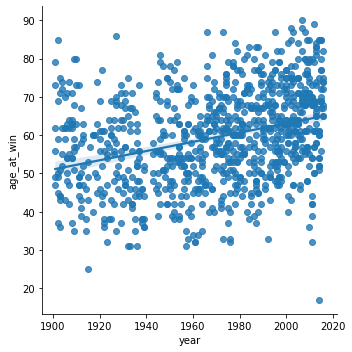

In [12]:
seaborn.lmplot(data = nobel_data_valid, x = 'year', y = 'age_at_win')

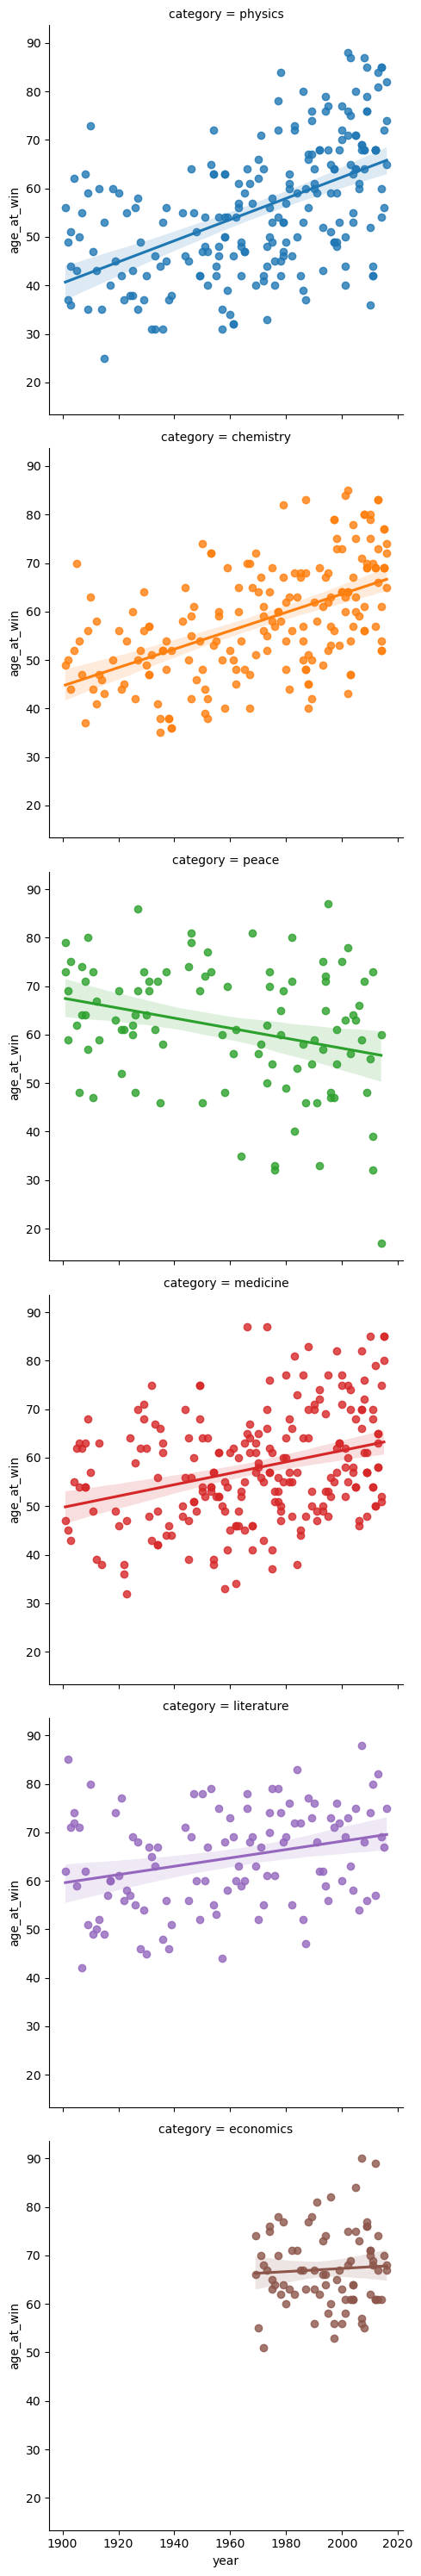

In [13]:
seaborn.lmplot(data = nobel_data_valid, x = 'year', y = 'age_at_win', row = 'category', hue = 'category')

### Question 4: Which universities dominate the Nobel Prize?

In [14]:
university_data = nobel_data_raw.groupby(['name', 'country'])['share'].count().sort_values(ascending = False).head(10)
university_data

name                                          country       
University of California                      USA               34
Harvard University                            USA               27
Massachusetts Institute of Technology (MIT)   USA               18
Stanford University                           USA               18
California Institute of Technology (Caltech)  USA               17
University of Cambridge                       United Kingdom    17
University of Chicago                         USA               17
Columbia University                           USA               16
Princeton University                          USA               14
Rockefeller University                        USA               11
Name: share, dtype: int64

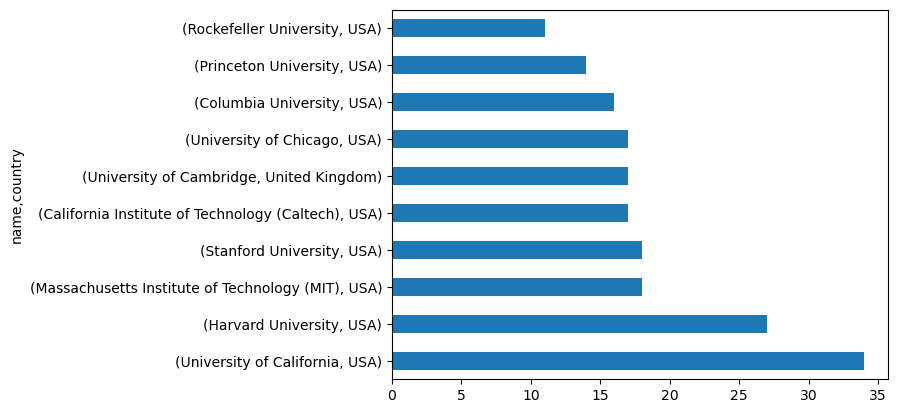

In [15]:
university_data_plot = university_data.plot.barh(y = 'name')

### Question 6: What proportion of laureates won the Nobel Prize more than once?

In [16]:
nobel_data_raw.groupby("surname").filter(lambda repeat_laureates: len(repeat_laureates) >= 2)


,id,firstname,surname,born,died,bornCountry,bornCountryCode,bornCity,diedCountry,diedCountryCode,diedCity,gender,year,category,share,name,city,country,age_at_win
5,6,Marie,"Curie, née Sklodowska",1867-11-07,1934-07-04,Russian Empire (now Poland),PL,Warsaw,France,FR,Sallanches,female,1903.0,physics,4.0,NaN,NaN,NaN,36
6,6,Marie,"Curie, née Sklodowska",1867-11-07,1934-07-04,Russian Empire (now Poland),PL,Warsaw,France,FR,Sallanches,female,1911.0,chemistry,1.0,Sorbonne University,Paris,France,44
9,10,Joseph John,Thomson,1856-12-18,1940-08-30,United Kingdom,GB,"Cheetham Hill, near Manchester",United Kingdom,GB,Cambridge,male,1906.0,physics,1.0,University of Cambridge,Cambridge,United Kingdom,50
19,20,Sir William Henry,Bragg,1862-07-02,1942-03-12,United Kingdom,GB,Wigton,United Kingdom,GB,London,male,1915.0,physics,2.0,University College,London,United Kingdom,53
20,21,William Lawrence,Bragg,1890-03-31,1971-07-01,Australia,AU,Adelaide,United Kingdom,GB,Ipswich,male,1915.0,physics,2.0,Victoria University,Manchester,United Kingdom,25
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
945,910,Stefan W.,Hell,1962-12-23,NaT,Romania,RO,Arad,NaN,NaN,NaN,male,2014.0,chemistry,3.0,German Cancer Research Center,Heidelberg,Germany,52
956,921,Tomas,Lindahl,1938-01-28,NaT,Sweden,SE,Stockholm,NaN,NaN,NaN,male,2015.0,chemistry,3.0,Francis Crick Institute,Hertfordshire,United Kingdom,77
957,921,Tomas,Lindahl,1938-01-28,NaT,Sweden,SE,Stockholm,NaN,NaN,NaN,male,2015.0,chemistry,3.0,Clare Hall Laboratory,Hertfordshire,United Kingdom,77
958,922,Paul,Modrich,1946-06-13,NaT,USA,US,"Raton, NM",NaN,NaN,NaN,male,2015.0,chemistry,3.0,Howard Hughes Medical Institute,"Durham, NC",USA,69


In [17]:
%sql 
SELECT surname, COUNT(*)
FROM nobel_data_raw
GROUP BY surname
HAVING COUNT(*) > 1

SyntaxError: invalid syntax (3250332988.py, line 2)

We are interested in learning the proportion of laureates who won the Nobel Prize more than once. 

### Question 7: What proportion of laureates are family members?

Adding on to previous question, we would also like to see how many laureates are family members. 

## Data Description 
### What are the observations (rows) and the attributes (columns)?

The observations in our data frame are 937 Nobel Prize laureates, representing all winners from the first prizes awarded through the year 2016. In other words, each row represents a single laureate.

The attributes are:

- id - identifies each laureate 
- firstname - laureate's first name 
- surname - laureate's surname 
- born - laureate's birth date 
- died - laureate's death date 
- bornCountry - laureate's birth place 
- bornCountryCode - the country code of the laureate's country of origin
- bornCity - the name of the city where the laureate was born
- diedCountry - the name of the country where the laureate died
- diedCountryCode - the country code of the laureate's country of death
- diedCity - the name of the city where the laureate died
- gender - laureate's gender or laureate's organization ('male,' 'female,' or 'org' - organization)
- year - the year that the laureate won their prize
- category - the category in which the laureate won their prize ('physics,' 'chemistry,' 'peace,' 'medicine,' 'literature,' 'economics')
- overallMotivation - overall motivation for being awarded the prize
- share - number of other laureates who share the prize 
- motivation - the motivation behind being awarded the prize

### Why was this dataset created?

The dataset was assembled by Maryna Kuzmenko in 2016, and intended to be a starting point for social sciences research into the characteristics of Nobel prize awards and laureates (both quantitative and categorical). It is available through the Harvard Dataverse Repository. 

### Who funded the creation of the dataset?



Is any information missing from individual instances?

Are there any errors, sources of noise, or redundancies in the dataset?

Does the dataset identify any subpopulations (e.g., by age, gender)? If so, please describe how these subpopulations are identified and provide a description of their respective distributions within the dataset.

Is it possible to identify individuals (i.e., one or more natural persons), either directly or indirectly (i.e., in combination with other data) from the dataset? If so, please describe how.

How was the data associated with each instance acquired?

### What processes might have influenced what data was observed and recorded and what was not?



### What preprocessing was done, and how did the data come to be in the form that you are using?



### If people are involved, were they aware of the data collection and if so, what purpose did they expect the data to be used for?

Though there is no record that the Nobel laureates that were living at the time this dataset was assembled were notified, the data collected about them (as at least semi-public figures) is publicly available. 

### Where can your raw source data be found, if applicable? Provide a link to the raw data (hosted in a Cornell Google Drive or Cornell Box)

https://drive.google.com/file/d/1x30zuyFBpWepBgc7cQt9x1yU46Qscgtg/view?usp=sharing

## Data Limitations

One primary limitation of our data is that it was collected in 2016: there have been 6 years' worth of laureates since then, and thus 6 years of data we cannot work with. It is also of some concern that the most recent years are missing: if there are any trends over time in our data, this might limit our ability to accurately model those trends or make predictions. 